In [400]:
import torch
import warnings
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import expon, uniform, skew
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, ParameterGrid, LeaveOneOut
import torch.nn as nn
import torch.nn.functional as F
import xgboost as xgb
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA


<h1>Exploratory data analysis</h1>
We start importing the dataset and analyzing it to understand it's main characteristics 

In [401]:
filepath = "/Users/matteobruno/Documents/Bocconi/Second Year/Second semester/Machine Learning/mldata_0003220050"
df = pd.read_csv(f"{filepath}/mldata_0003220050.csv")
df.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,0,2,-2.533597,1.210810,5.178345,1.970166,-0.396690,0.925037,0.772363,3.771715,...,6.874262,0.306139,2.799398,3.069729,-0.293842,1.713721,0.373085,-2.805966,1.450246,0.229183
1,1,2,2.294015,1.921304,4.908135,3.111812,-0.815101,0.089350,-0.227257,-1.172884,...,3.545395,-1.339132,1.512097,-4.298026,-0.369014,-2.180730,-0.681165,3.509535,-0.326189,-0.595158
2,2,0,-4.139196,-1.657751,-8.564121,-0.606141,3.821726,0.451151,1.160804,0.968444,...,-1.370844,0.476598,1.026255,2.733913,0.565946,0.813877,-0.095221,0.883783,0.144276,-1.018317
3,3,1,1.311541,-0.162606,5.237739,-1.423069,0.221585,0.307549,-1.347633,3.699331,...,3.327868,1.304332,2.073334,0.189572,-0.920069,-0.864346,0.124697,1.553445,2.076299,-0.062647
4,4,1,-4.645145,0.599795,-8.070413,-1.593028,-0.990336,1.479665,0.707394,-2.991751,...,-8.149686,0.662296,-0.769526,0.365299,1.127639,-0.655864,-0.059303,-0.108369,-0.299684,1.026153


The column "Unnamed:0" seems to be just a list of indices, hence we don't need it and we can remove it 

In [402]:
df.pop("Unnamed: 0")
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,2,-2.533597,1.210810,5.178345,1.970166,-0.396690,0.925037,0.772363,3.771715,-0.700460,...,6.874262,0.306139,2.799398,3.069729,-0.293842,1.713721,0.373085,-2.805966,1.450246,0.229183
1,2,2.294015,1.921304,4.908135,3.111812,-0.815101,0.089350,-0.227257,-1.172884,2.805439,...,3.545395,-1.339132,1.512097,-4.298026,-0.369014,-2.180730,-0.681165,3.509535,-0.326189,-0.595158
2,0,-4.139196,-1.657751,-8.564121,-0.606141,3.821726,0.451151,1.160804,0.968444,0.657208,...,-1.370844,0.476598,1.026255,2.733913,0.565946,0.813877,-0.095221,0.883783,0.144276,-1.018317
3,1,1.311541,-0.162606,5.237739,-1.423069,0.221585,0.307549,-1.347633,3.699331,-0.347670,...,3.327868,1.304332,2.073334,0.189572,-0.920069,-0.864346,0.124697,1.553445,2.076299,-0.062647
4,1,-4.645145,0.599795,-8.070413,-1.593028,-0.990336,1.479665,0.707394,-2.991751,-2.055145,...,-8.149686,0.662296,-0.769526,0.365299,1.127639,-0.655864,-0.059303,-0.108369,-0.299684,1.026153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,2.930619,1.078147,-0.760414,-0.930338,-2.924856,-1.307707,0.424128,0.063992,3.432288,...,0.229042,-0.672809,-2.558900,1.294684,1.145512,1.915434,-0.334840,-1.463331,0.548696,1.693375
1096,2,5.479958,-0.808320,-3.256542,0.214107,-3.082908,0.046493,-0.166230,1.164215,1.717748,...,-6.894506,-0.264557,-3.151759,-2.229226,1.543075,-0.233851,0.093357,1.932303,0.227319,0.490931
1097,1,1.801275,-0.183714,2.042403,-3.910840,1.057853,0.054319,-0.408369,2.323861,-2.420824,...,-0.251082,2.122419,0.653402,2.240507,0.427066,0.290009,-1.606784,-0.202041,-0.012391,1.290524
1098,0,-1.094989,-0.816735,1.691919,0.714113,2.056565,0.074303,1.596143,2.645216,1.459042,...,3.488724,1.065861,2.945785,2.173369,-0.345128,0.766563,-0.390899,1.347011,0.635805,-0.570695


In [403]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,1.016364,0.253367,0.024595,-0.325595,-0.407954,0.059328,0.091592,0.134280,0.494439,0.178258,...,-0.027498,0.120728,0.185209,0.695642,0.161473,0.141242,0.081440,0.480448,0.088552,0.108221
std,0.809242,4.541018,0.938885,4.997114,2.236182,2.208390,1.009674,1.006690,2.194498,2.143145,...,4.175451,1.007612,2.140041,2.100593,0.972774,1.004382,0.965846,1.997159,1.020588,1.002692
min,0.000000,-19.177521,-3.225843,-20.271036,-7.611008,-7.736649,-2.922044,-2.805430,-6.678702,-5.596925,...,-13.979835,-3.420288,-5.863113,-6.897322,-3.348251,-3.086154,-2.926220,-6.201497,-3.056901,-2.943205
25%,0.000000,-2.583894,-0.621837,-3.585929,-1.797459,-1.433551,-0.583100,-0.579111,-1.088859,-1.360405,...,-2.738570,-0.512540,-1.224153,-0.605324,-0.476870,-0.570406,-0.537939,-0.896898,-0.577296,-0.538200
50%,1.000000,0.681743,0.018823,-0.317160,-0.593167,0.094682,0.057609,0.070742,0.491844,0.184071,...,-0.269060,0.147078,0.253651,0.789011,0.165445,0.174767,0.087626,0.464577,0.112993,0.104262
75%,2.000000,3.339834,0.667331,3.042250,0.976400,1.545547,0.736510,0.792461,1.986797,1.509898,...,2.619238,0.794408,1.722161,2.187731,0.808203,0.815582,0.724397,1.789812,0.772262,0.781964
max,2.000000,11.065576,2.978649,14.118559,6.681059,6.737058,3.333566,3.607291,8.235266,8.019084,...,15.889553,2.785817,5.982296,7.842038,3.281840,3.169289,3.431935,6.822414,3.745605,3.075802


All the features have mean near zero. However, the range in which each feature takes values can vary substantially 

In [404]:
df.isnull().sum()

label         0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
dtype: int64

As wee can see here, the dataset has no null entries

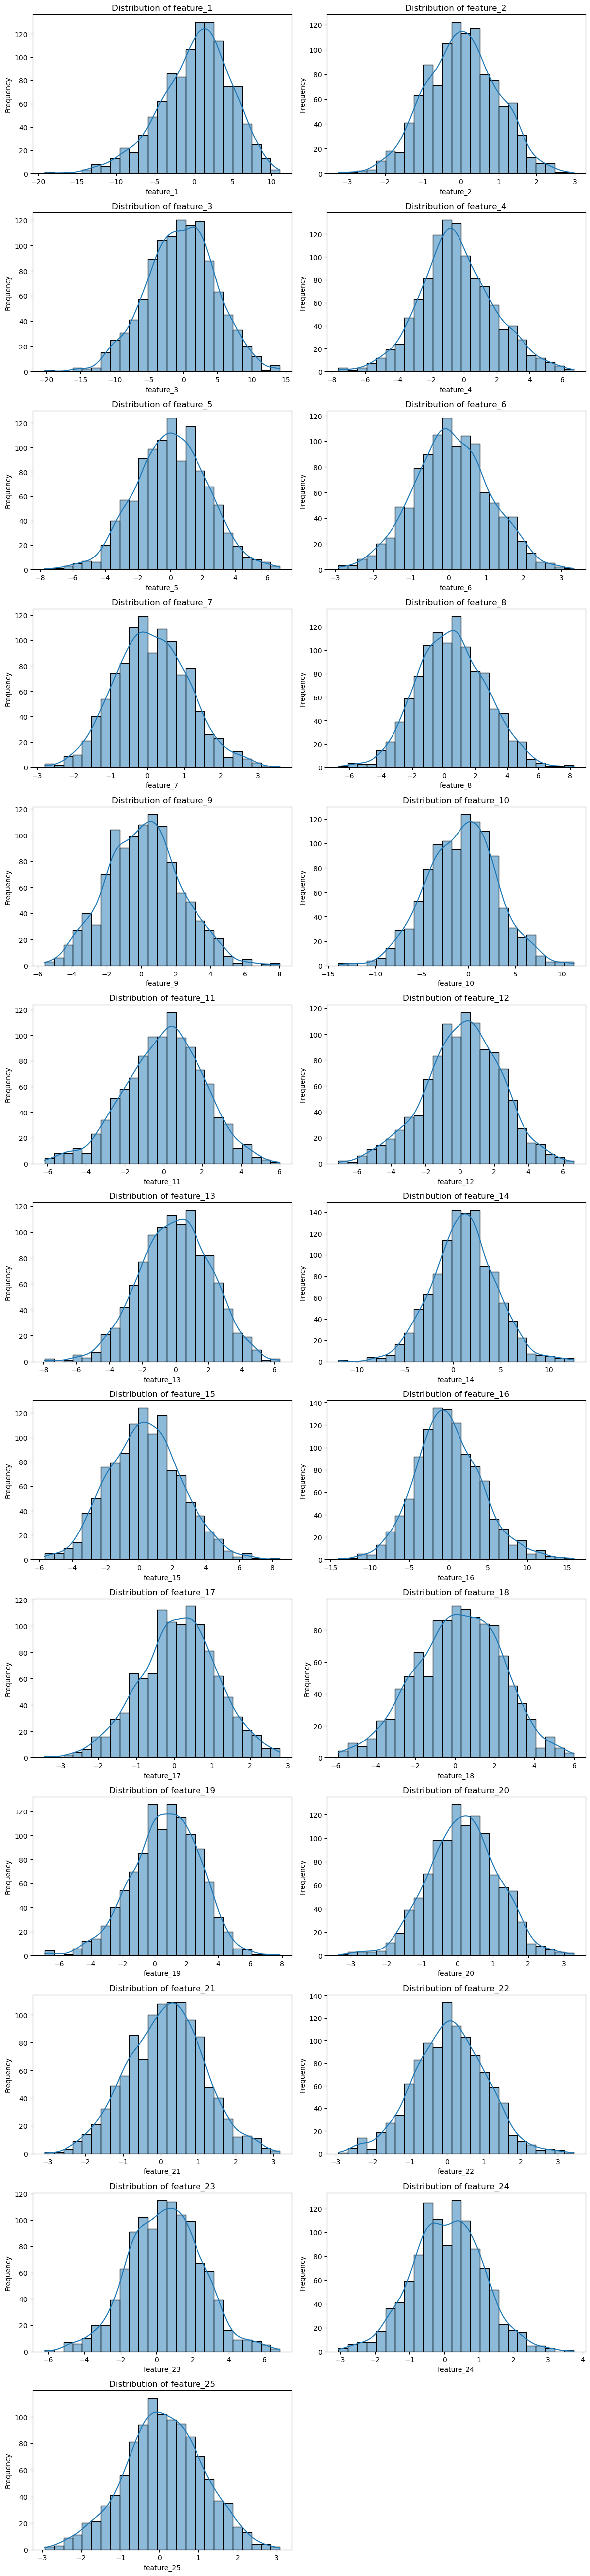

In [405]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
rows = (num_columns + 1) // 2  
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i, column in enumerate(df.columns[1:]):
    sns.histplot(df[column], bins=25, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


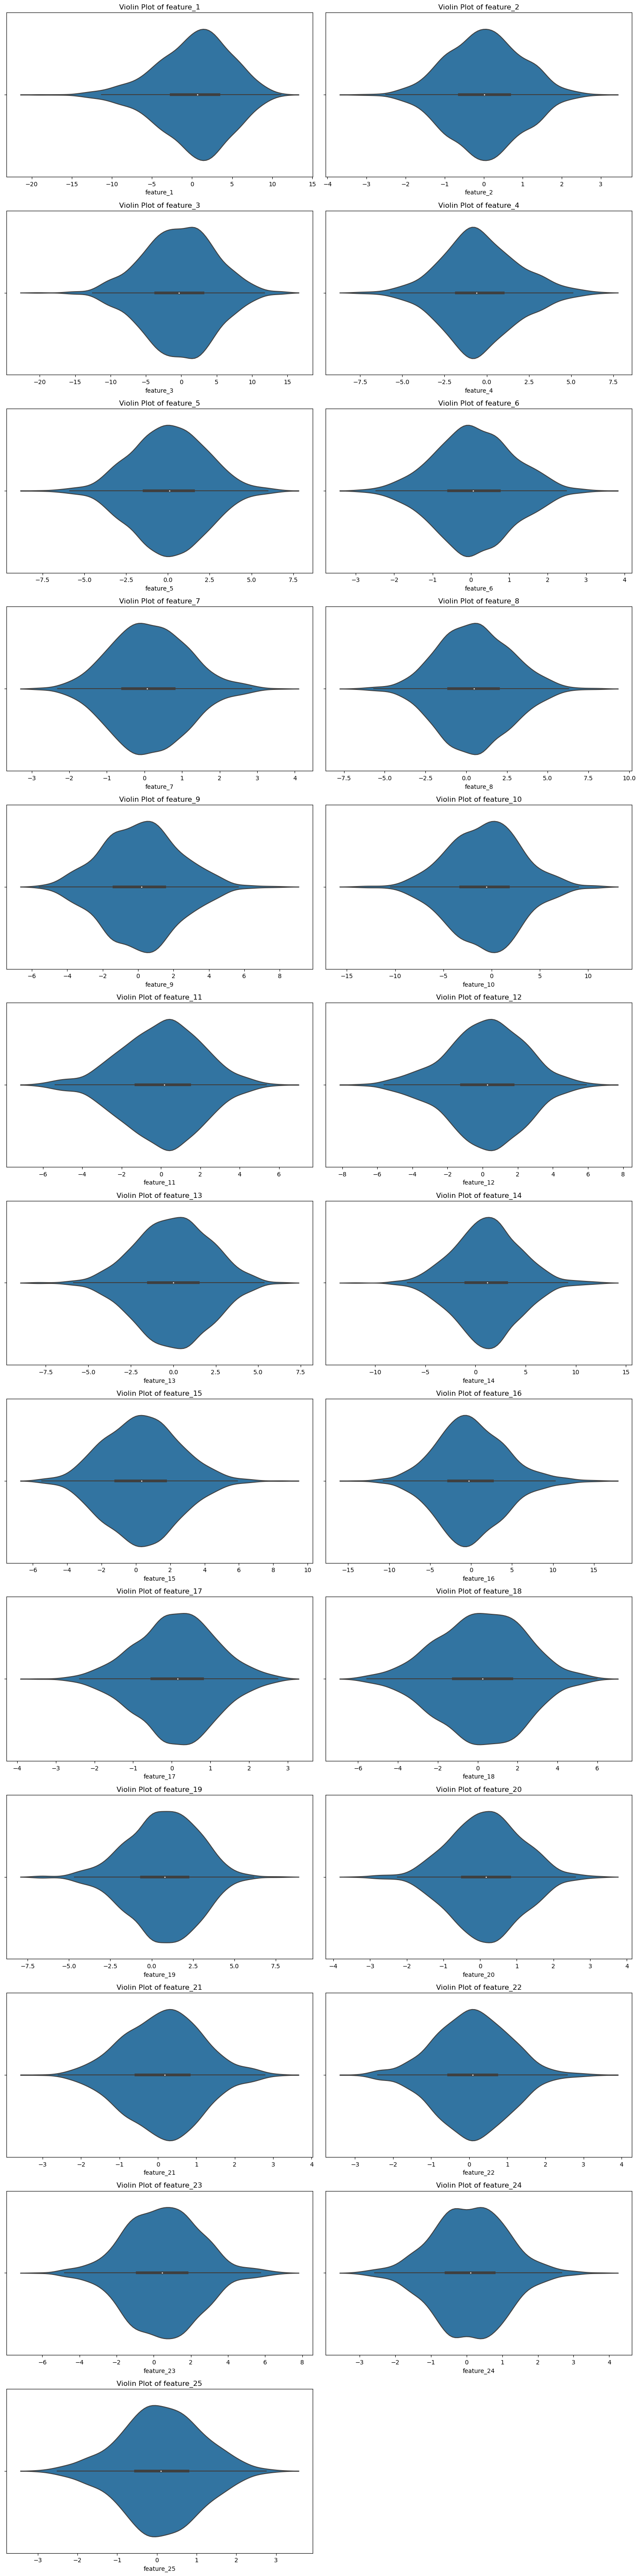

In [406]:
features_to_plot = df.columns[1:26]
fig, axes = plt.subplots(13, 2, figsize=(15, 60))

axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.violinplot(x=df[feature],ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature}')
 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Histograms and violinplots confirm that the majority of the density is near zero for all the features

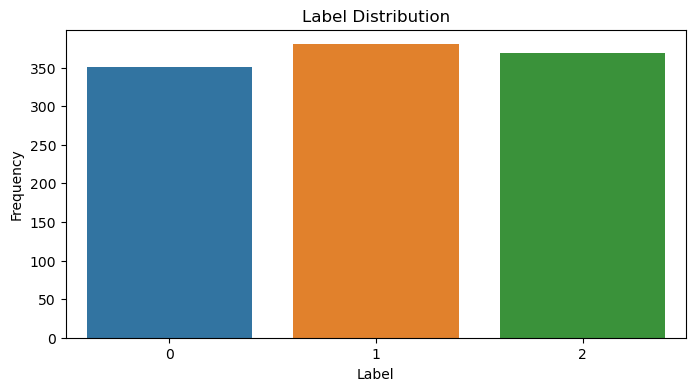

In [407]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='label')

plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

Here we can see that datapoints are balanced among the three classes. This is good news because it means that we can use accuracy as a metric obtaining a faithful representation of the model's performance.

In [408]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In the next few lines, we compute the skewnee of each feature

feature_1    -0.537789
feature_2    -0.018862
feature_3    -0.133979
feature_4     0.187604
feature_5    -0.044472
feature_6     0.047774
feature_7     0.160342
feature_8     0.105947
feature_9     0.163168
feature_10   -0.020419
feature_11   -0.211769
feature_12   -0.210448
feature_13   -0.145101
feature_14    0.067551
feature_15    0.128538
feature_16    0.305894
feature_17   -0.109625
feature_18   -0.136555
feature_19   -0.267190
feature_20   -0.068190
feature_21    0.001727
feature_22   -0.007823
feature_23    0.026448
feature_24    0.004498
feature_25   -0.074482
dtype: float64


Text(0.5, 0, 'Skewness of each feature')

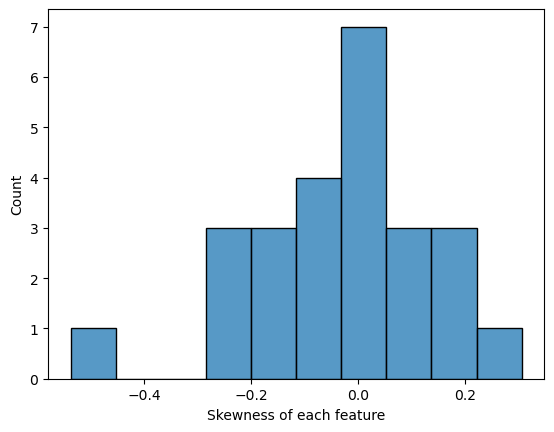

In [409]:
skewness = X.apply(skew, axis=0)
print(skewness)

sns.histplot(skewness, bins=10)
plt.xlabel('Skewness of each feature')


As we can see, the values of skewness for each feature is fairly close to zero, impying that we have a fairly symmetrical distribution for each feature

<h3>Correlation</h3>

Number of columns included:  ()
Average correlation of expression profiles between features:  0.18752885351451487
percentage of high correlation entries: 4.00%


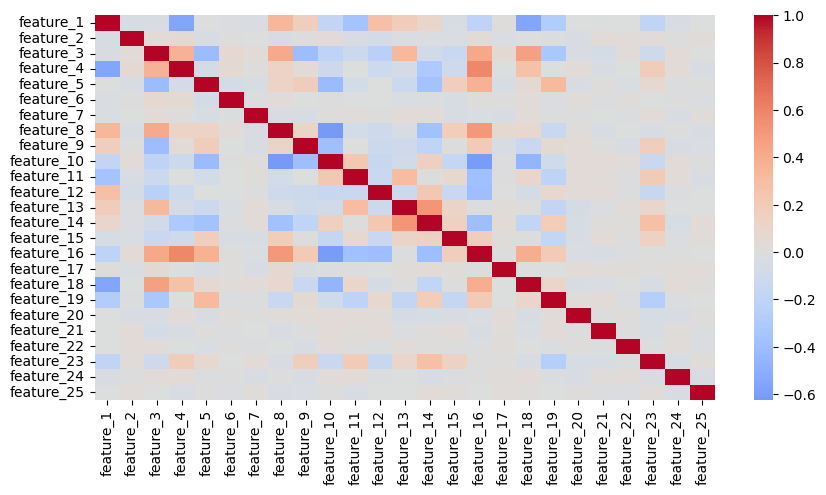

In [410]:
plt.figure(figsize=(10,5))
c= df.iloc[:,1:].corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
sns.heatmap(c,cmap='coolwarm', center=0 )
print("Number of columns included: ", np.shape(1))
print("Average correlation of expression profiles between features: ", midpoint)

matrix = c.to_numpy()
high_correlation_entries = matrix[matrix >= 0.7].size + matrix[matrix <= -0.7].size
print(f"percentage of high correlation entries: {high_correlation_entries / matrix.size * 100:.2f}%")

From the correlation matrix between features we notice that we have a very low percentage of features with high correlation. 

Number of cells included:  (1100, 1100)
Average correlation of expression profiles between observations:  0.02955538612580544
percentage of high correlation entries: 3.36%


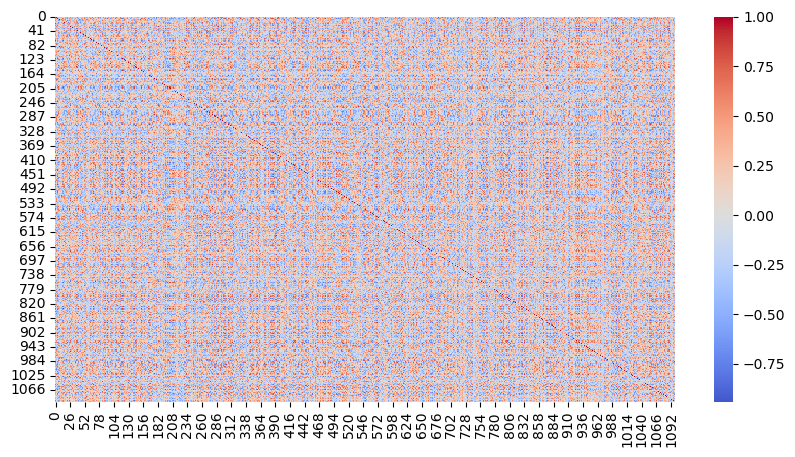

In [411]:
plt.figure(figsize=(10,5))
c1 = df.transpose().iloc[1:,:]
c1 = c1.corr()
midpoint = (c1.values.max() - c1.values.min()) /2 + c1.values.min()
sns.heatmap(c1,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(c1))
print("Average correlation of expression profiles between observations: ", midpoint)

matrix = c1.to_numpy()

high_correlation_entries = matrix[matrix >= 0.7].size + matrix[matrix <= -0.7].size
print(f"percentage of high correlation entries: {high_correlation_entries / matrix.size * 100:.2f}%")

The same is true for the correlation between observations: pairs with correlation above 0.7 or below -07 (high positive or negative correlation) are quite rare.

In [412]:
sparsity = (X==0).sum().sum() / (df.shape[0] * df.shape[1]) * 100
sparsity

0.0

Our dataset is not sparse: X has no 0 entry 

<h3>Outliers</h3>

In [413]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))


print(f"Outliers percentage (IQR method):{(outliers_iqr.sum().sum())/ X.size * 100:.2f}%")


Outliers percentage (IQR method):0.94%


In [414]:
z_scores = np.abs((X - X.mean()) / X.std())

threshold = 3

outliers_z = (z_scores > threshold)
print(f"Outliers percentage (Z-score method):{(outliers_z.sum().sum())/ X.size * 100:.2f}%")

Outliers percentage (Z-score method):0.30%


We also have very few outliers in the dataset, as shown by the IQR and Z-score methods. Both yield a percentage of outliers below 1%. 


<h3>Normalization</h3>

Based on the EDA, we can say that the only sensible thing that should be done is normalizing the dataset, since features take values in ranges that are sometimes quite different between eachother.

In [415]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Standardized features:")
print(X)
y = y.to_numpy()

Standardized features:
[[-0.61401024  1.26400456  1.10192474 ... -1.64629296  1.33483174
   0.1206921 ]
 [ 0.44958558  2.02109173  1.047827   ...  1.51738828 -0.40655964
  -0.70181014]
 [-0.96774788 -1.79267044 -1.64940673 ...  0.20204608  0.05462459
  -1.12402449]
 ...
 [ 0.34102766 -0.22196954  0.47408867 ... -0.34188542 -0.09895239
   1.17966489]
 [-0.29706298 -0.89650274  0.40391952 ...  0.43409554  0.53645667
  -0.6774009 ]
 [ 0.36511944  0.24398989 -0.26665558 ... -0.06514415 -1.43095749
   0.7510421 ]]


<h3>Feature importance</h3>

train accuracy: 1.0, test accuracy: 0.759090909090909


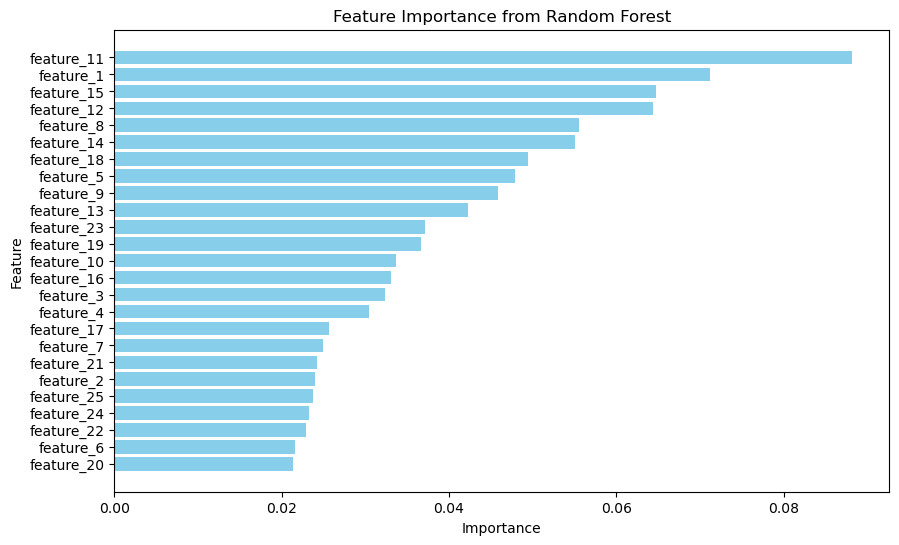

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(f"train accuracy: {rf_model.score(X_train, y_train)}, test accuracy: {rf_model.score(X_test, y_test)}")

# Get the feature importances
importances = rf_model.feature_importances_
feature_names = df.iloc[:, 1:].columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis() 
plt.show()

We plot here feature importance for each feature according to the random forest classifier. Even though using random forest as a classifier wasn't initally raken into consideration, we notice that it has an acceptable level of accuracy and that it should therefore taken into consideration later.

<h1>Clustering</h1>

We now move onto performing hierarchical and K-means clustering 

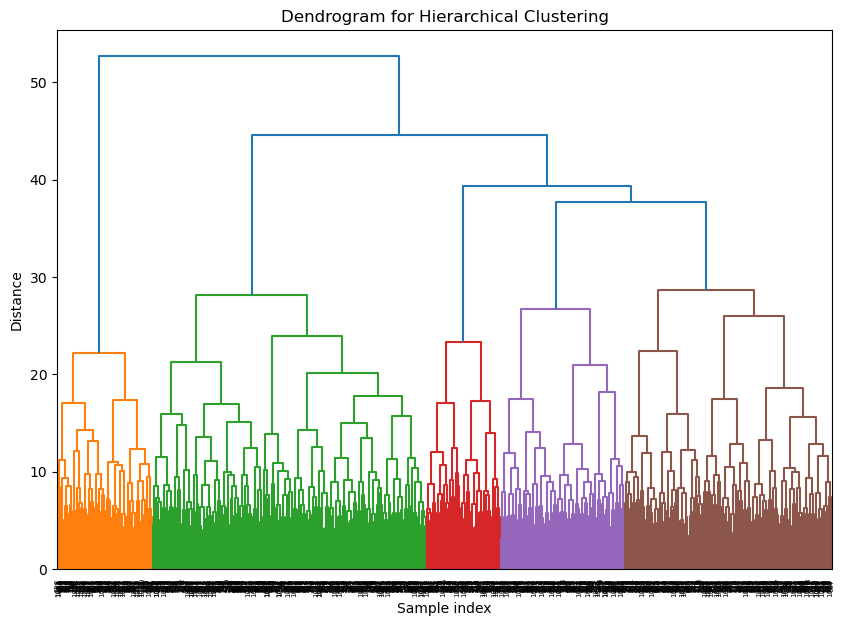

In [417]:
Z = shc.linkage(X, method='ward')

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dend = shc.dendrogram(Z)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

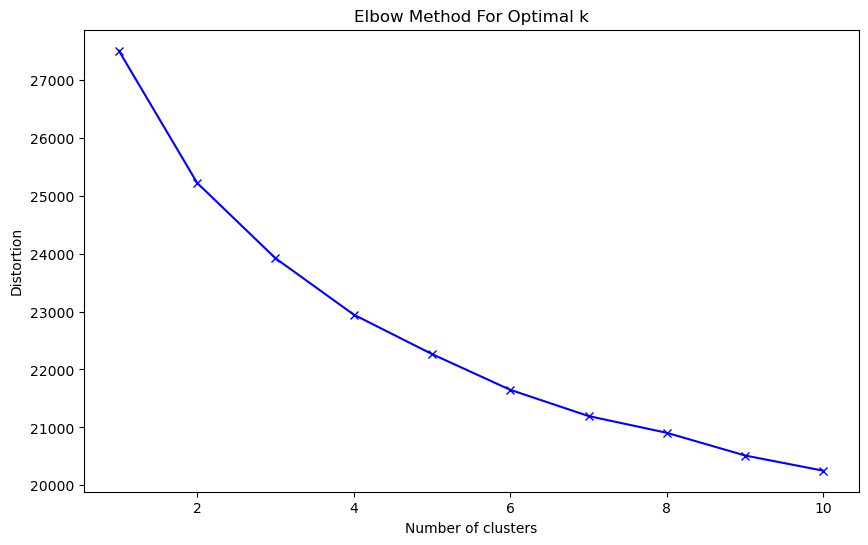

The optimal number of clusters is: 2


In [418]:
def plot_elbow_method(data, max_k):

    distortions = []
    K = range(1, max_k+1)

    for k in K:

        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    second_derivative = np.diff(np.diff(distortions))
    optimal_k = np.argmax(second_derivative) + 2 
    
    return optimal_k

optimal_k = plot_elbow_method(X, 10)
print(f"The optimal number of clusters is: {optimal_k}")

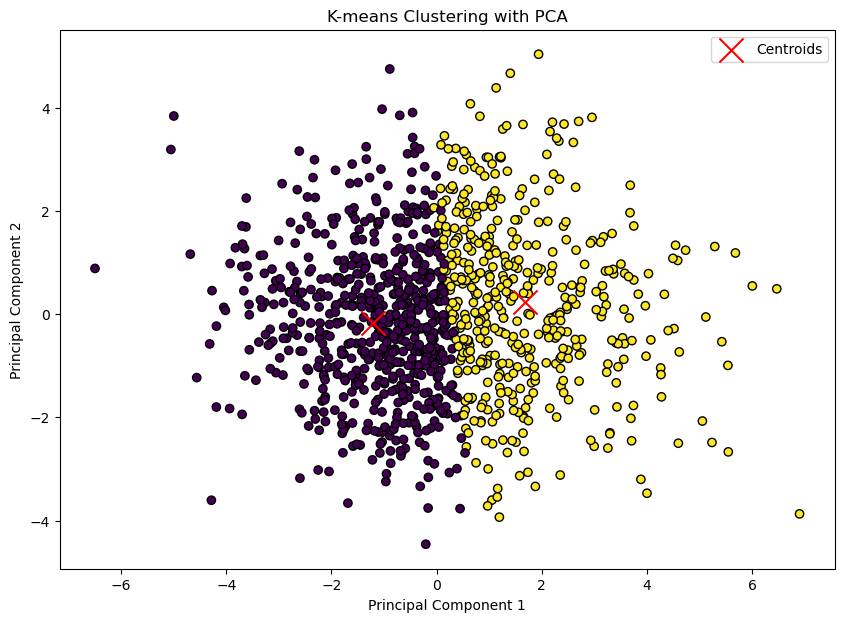

In [419]:
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df['Cluster'] = labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

For the last plot, we use a compressd dataset with just two principal components obtained through PCA. In this way, it is possible to represent the two clusters in two dimensions. We pick 2 as the number of clusters using the elbow method. Judging from the plot, however, the two clusters are not clearly separated. 

In [420]:
df.pop("Cluster")


0       1
1       1
2       1
3       1
4       0
       ..
1095    0
1096    0
1097    0
1098    1
1099    0
Name: Cluster, Length: 1100, dtype: int32

<h1>Classification</h1>
<h3>Random Forest Classifier</h3>

Since, as previously said said, the random forest classifier seems to be yielding good result, before moving to other classifiers we will try to see if we can optimize the parametetrs to get an even better accuracy. We use grid search

In [421]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [25]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit Grid Search to the data
grid_search.fit(X, y)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross validation score found: {grid_search.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'max_features': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross validation score found: 0.7345454545454546


Train accuracy: 1.0
Test accuracy: 0.7454545454545455


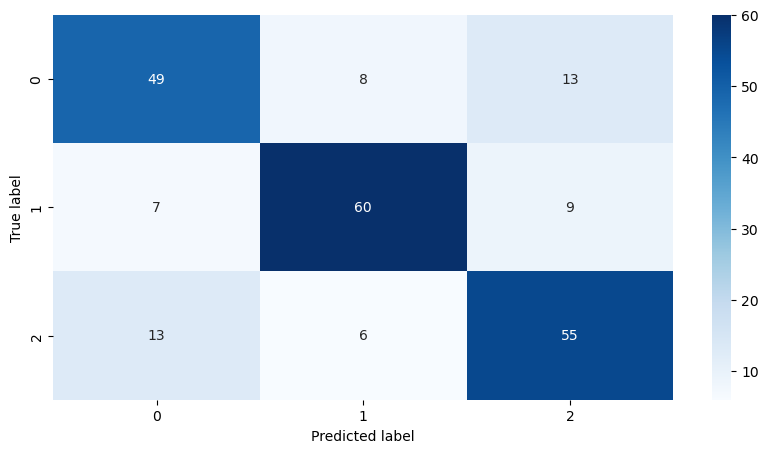

In [422]:
#See if the best model is overfitting and confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
best_model0 = grid_search.best_estimator_
best_model0.fit(X_train, y_train)
y_pred_test = best_model0.predict(X_test)
y_pred_train = best_model0.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}")

confusion = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

We don't get any significant improvement in the accuracy level after runnign GridSearchCV. Moreover, we can see that the optimal model found by the grid search is significantly overfitting: the accuracy on unseen data is much lower than the accuracy on training data 

<h3>Support Vector Machine</h3>

We now implement a support Vector Machine usign the sklearn LinearSVC model. To decide what are the optimal parameter, we perform a random search, usign cross validation to asses the model performance

In [423]:
clf = LinearSVC(random_state=1)
param_dist = [{
    'C': expon(scale=100),                 
    'penalty': ['l2'],               
    'loss': ['hinge'],    
    'dual': [True],                 
    'max_iter':  [10, 100, 1000, 10000]         
},
{
    'C': expon(scale=100),                 
    'penalty': ['l1' ,'l2'],               
    'loss': ['squared_hinge'],    
    'dual': [False],                 
    'max_iter':  [10, 100, 1000, 10000] 

}
]

random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, error_score=np.nan)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=1), n_iter=50,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30b0f1050>,
                                         'dual': [True], 'loss': ['hinge'],
                                         'max_iter': [10, 100, 1000, 10000],
                                         'penalty': ['l2']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x340ba8a90>,
                                         'dual': [False],
                                         'loss': ['squared_hinge'],
                                         'max_iter': [10, 100, 1000, 10000],
                                         'penalty': ['l1', 'l2']}],
                   random_state=42, scoring='accuracy')

In [424]:
# Get best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

Best parameters: {'C': 189.7377203229012, 'dual': True, 'loss': 'hinge', 'max_iter': 10000, 'penalty': 'l2'}
Best cross-validation score: 0.6954545454545454


Train accuracy: 0.7068181818181818
Test accuracy: 0.6954545454545454


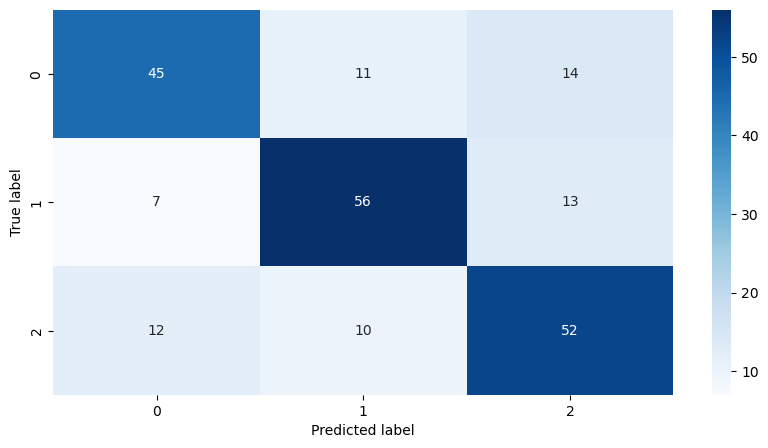

In [425]:
#See if the best model is overfitting and confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
best_model1 = random_search.best_estimator_
best_model1.fit(X_train, y_train)
y_pred_test = best_model1.predict(X_test)
y_pred_train = best_model1.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}")

confusion = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In this case, we can see that with the optimal parameters, our model is not overfitting. However, the best cross-validation score is giving us an accuracy below 70%, significantlly worst than the accuracy of the random forest model.

<h3>Logistic Regression</h3>

We now try using a Linear Regression model. Once again, we use RandomizedSearchCV to deterimine the best parameters.

In [426]:
logistic_model = LogisticRegression(random_state=42)
scores = cross_val_score(logistic_model, X, y, cv=5) 
print(f"Cross-validation accuracy: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")


Cross-validation accuracy: [0.66818182 0.72272727 0.7        0.70909091 0.66818182]
Mean cross-validation accuracy: 0.6936363636363636


In [427]:
warnings.simplefilter("ignore", category=FutureWarning)

param_distributions = [{
    'C': uniform(0.01, 10),
    'penalty': ['l2'],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
},
{
    'C': uniform(0.01, 10),
    'multi_class': ['ovr'],
    'penalty': ['l1'],
    'solver': ['saga', 'liblinear']
}
]
random_search2 = RandomizedSearchCV(logistic_model, param_distributions, n_iter=100, cv=5, random_state=42)

random_search2.fit(X, y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x311592cd0>,
                                         'multi_class': ['ovr', 'multinomial'],
                                         'penalty': ['l2'],
                                         'solver': ['lbfgs', 'newton-cg', 'sag',
                                                    'saga']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x158ceff90>,
                                         'multi_class': ['ovr'],
                                         'penalty': ['l1'],
                                         'solver': ['saga', 'liblinear']}],
                   random_state=42)

In [428]:
print(f"Best parameters: {random_search2.best_params_}")
print(f"Best cross-validation score: {random_search2.best_score_}")

Best parameters: {'C': 0.9410276780589921, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.6936363636363636


Train accuracy: 0.7113636363636363
Test accuracy: 0.6727272727272727


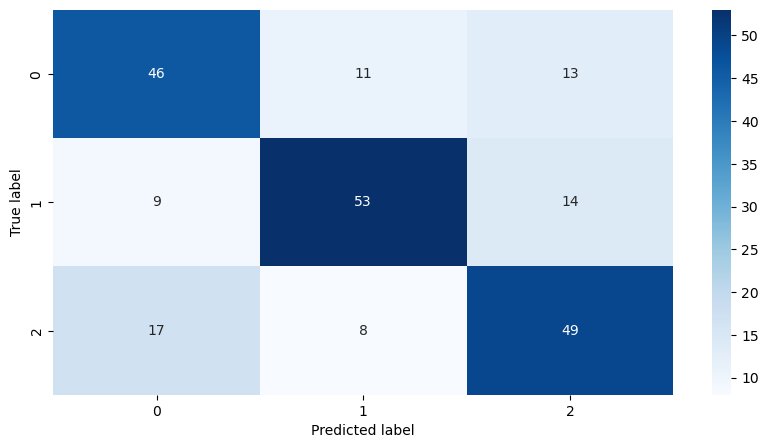

In [429]:
best_model2 = random_search2.best_estimator_
best_model2.fit(X_train, y_train)
y_pred_test2 = best_model2.predict(X_test)
y_pred_train2 = best_model2.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train2)}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test2)}")

confusion2 = confusion_matrix(y_test, y_pred_test2)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

We get very similar results to the Support Vector Machine 

<h3>Multi-layer Perceptron</h3>

We know try to implement a Multi-layer perceptron model. As we did before, we try multiple combinations of parameters evaluating each time the model with five fold cross validation

In [430]:
class MLP(nn.Module):
    def __init__(self, num_features, num_classes, hidden_layer_sizes):
        super(MLP, self).__init__()
        layers = []
        input_size = num_features
        for hidden_size in hidden_layer_sizes:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.4))
            input_size = hidden_size
        layers.append(nn.Linear(input_size, num_classes))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [431]:
# Ensure data is on the correct device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using CUDA: {torch.cuda.get_device_name(0)}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Apple Silicon GPU)")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using MPS (Apple Silicon GPU)


In [432]:
def train_and_evaluate_model(params, X, y, n_splits=5, print_epochs=False):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    
    torch.manual_seed(42)
    
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {fold + 1}/{n_splits}")

        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
        X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)

        model_mlp = MLP(num_features=X.shape[1], num_classes=len(np.unique(y)), hidden_layer_sizes=params['hidden_layer_sizes'])
        model_mlp.to(device)
        optimizer = torch.optim.Adam(model_mlp.parameters(), lr=params['learning_rate'])

        for epoch in range(params['num_epochs']):
            model_mlp.train()
            logits = model_mlp(X_train.to(device))
            loss = F.cross_entropy(logits, y_train.to(device))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if print_epochs and (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{params['num_epochs']} - Loss: {loss.item()}")
                model_mlp.eval()
                with torch.no_grad():
                    val_logits = model_mlp(X_val.to(device))                
                    val_preds = torch.argmax(val_logits, dim=1)
                    train_preds = torch.argmax(logits, dim=1)
                    val_accuracy = accuracy_score(y_val.cpu(), val_preds.cpu())
                    train_accuracy = accuracy_score(y_train.cpu(), train_preds.cpu())
                    print(f"Fold {fold + 1} - Train accuracy: {train_accuracy:.4f}, Validation accuracy: {val_accuracy:.4f}")
        
        model_mlp.eval()
        with torch.no_grad():
            val_logits = model_mlp(X_val.to(device))                
            val_preds = torch.argmax(val_logits, dim=1)
            val_accuracy = accuracy_score(y_val.cpu(), val_preds.cpu())
            val_precision = precision_score(y_val.cpu(), val_preds.cpu(), average='macro', zero_division=0)
            val_recall = recall_score(y_val.cpu(), val_preds.cpu(), average='macro', zero_division=0)

        accuracy_list.append(val_accuracy)
        precision_list.append(val_precision)
        recall_list.append(val_recall)

        print(f"Fold {fold + 1} - Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

    mean_accuracy = np.mean(accuracy_list)
    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)

    return mean_accuracy, mean_precision, mean_recall

In [433]:

param_grid = {
    'hidden_layer_sizes': [(256, 128, 64), (256, 128, 64, 32), (64, 64, 64), (32, 32, 32)],
    'learning_rate': [0.001, 0.005, 0.01],
    'num_epochs': [50, 100, 500]
}

best_params = None
best_accuracy = 0

for params in ParameterGrid(param_grid):
    print(f"Evaluating params: {params}")
    mean_accuracy, mean_precision, mean_recall = train_and_evaluate_model(params, X, y)
    print(f"Mean Accuracy: {mean_accuracy:.4f}, Mean Precision: {mean_precision:.4f}, Mean Recall: {mean_recall:.4f}")
    
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Mean Accuracy: {best_accuracy:.4f}")

Evaluating params: {'hidden_layer_sizes': (256, 128, 64), 'learning_rate': 0.001, 'num_epochs': 50}
Fold 1/5
Fold 1 - Accuracy: 0.7318, Precision: 0.7294, Recall: 0.7287
Fold 2/5
Fold 2 - Accuracy: 0.7318, Precision: 0.7309, Recall: 0.7306
Fold 3/5
Fold 3 - Accuracy: 0.7364, Precision: 0.7417, Recall: 0.7367
Fold 4/5
Fold 4 - Accuracy: 0.7909, Precision: 0.7861, Recall: 0.7867
Fold 5/5
Fold 5 - Accuracy: 0.7682, Precision: 0.7731, Recall: 0.7688
Mean Accuracy: 0.7518, Mean Precision: 0.7522, Mean Recall: 0.7503
Evaluating params: {'hidden_layer_sizes': (256, 128, 64), 'learning_rate': 0.001, 'num_epochs': 100}
Fold 1/5
Fold 1 - Accuracy: 0.7909, Precision: 0.7893, Recall: 0.7893
Fold 2/5
Fold 2 - Accuracy: 0.7773, Precision: 0.7771, Recall: 0.7771
Fold 3/5
Fold 3 - Accuracy: 0.7773, Precision: 0.7819, Recall: 0.7784
Fold 4/5
Fold 4 - Accuracy: 0.7682, Precision: 0.7647, Recall: 0.7670
Fold 5/5
Fold 5 - Accuracy: 0.7818, Precision: 0.7826, Recall: 0.7830
Mean Accuracy: 0.7791, Mean Prec

We can see that, usign the optimal paramenters, this model is the most accurate, giving an above 80% mean accuracy.

In [434]:
parameters = {
    'hidden_layer_sizes': (256, 128, 64),
    'learning_rate': 0.005,
    'num_epochs': 500
}
mean_accuracy, mean_precision, mean_recall = train_and_evaluate_model(parameters, X, y, print_epochs=True)
print(f"Mean Accuracy: {mean_accuracy:.4f}, Mean Precision: {mean_precision:.4f}, Mean Recall: {mean_recall:.4f}") 

Fold 1/5
Epoch 10/500 - Loss: 0.7193633913993835
Fold 1 - Train accuracy: 0.7170, Validation accuracy: 0.7273
Epoch 20/500 - Loss: 0.5538706183433533
Fold 1 - Train accuracy: 0.7932, Validation accuracy: 0.7455
Epoch 30/500 - Loss: 0.4270714521408081
Fold 1 - Train accuracy: 0.8364, Validation accuracy: 0.7636
Epoch 40/500 - Loss: 0.349414199590683
Fold 1 - Train accuracy: 0.8580, Validation accuracy: 0.7864
Epoch 50/500 - Loss: 0.2985767722129822
Fold 1 - Train accuracy: 0.8830, Validation accuracy: 0.7909
Epoch 60/500 - Loss: 0.23070809245109558
Fold 1 - Train accuracy: 0.9170, Validation accuracy: 0.7818
Epoch 70/500 - Loss: 0.19637493789196014
Fold 1 - Train accuracy: 0.9318, Validation accuracy: 0.7909
Epoch 80/500 - Loss: 0.1688254326581955
Fold 1 - Train accuracy: 0.9295, Validation accuracy: 0.7909
Epoch 90/500 - Loss: 0.1613232046365738
Fold 1 - Train accuracy: 0.9330, Validation accuracy: 0.7955
Epoch 100/500 - Loss: 0.11500280350446701
Fold 1 - Train accuracy: 0.9602, Valida

We can see that the model with optimal parameters is overfitting. However, the performace on unseen data is the best untill now.

<h3>XGBoost</h3>
For the XGBoost model we once again look for optimal parameters using grid search, using 5 fold cross-validation to asses performance


In [435]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.7609


Train accuracy: 1.0
Test accuracy: 0.7136363636363636


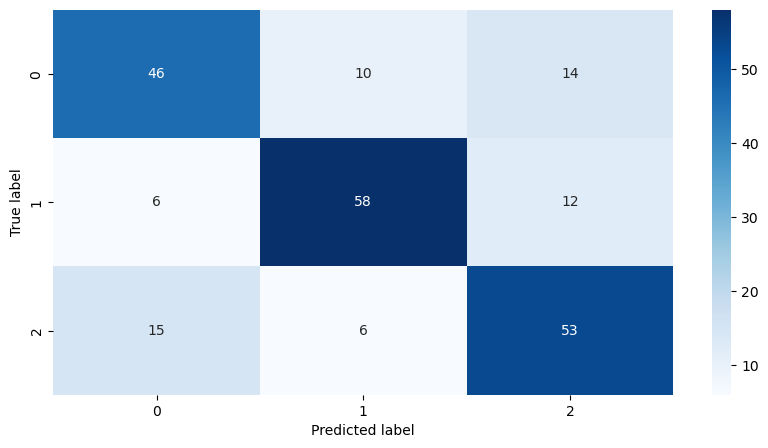

In [436]:
best_model4 = grid_search.best_estimator_
best_model4.fit(X_train, y_train)
y_pred_test4 = best_model4.predict(X_test)
y_pred_train4 = best_model4.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train4)}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test4)}")

confusion4 = confusion_matrix(y_test, y_pred_test4)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

We have decent performance even though no better than the MLP. However we have quite a bit of overfitting 

<h3>Voting Classifier</h3>

Finally, we try a voting classifier, using a majority vote form four of the previous models 

In [437]:
voting_clf = VotingClassifier(estimators=[
    ('rf', best_model0),
    ('svc', best_model1), 
    ('logistic', best_model2), 
    ('xgb', best_model4)
], voting='hard')


cv_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Cross-validation accuracy: [0.66818182 0.72272727 0.7        0.70909091 0.66818182]
Mean cross-validation accuracy: 0.6936363636363636


The mean cross validation accuracy is worst than what we got with XGBoost alone so we discart the model.

<h1>Predictions</h1>

The last thing left to do is using the best model, the Multi Layer Perceptron, to make our predictions. To do so, we first train the optimal MLP model on the whole dataset X. In particular we use the parameters we found before: 'hidden_layer_sizes': (256, 128, 64), 'learning_rate': 0.005, 'num_epochs': 500

In [438]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

parameters = {
    'hidden_layer_sizes': (256, 128, 64),
    'learning_rate': 0.005,
    'num_epochs': 500
}

best_model_mlp = MLP(num_features=X.shape[1], num_classes=len(np.unique(y)), hidden_layer_sizes=params['hidden_layer_sizes'])
best_model_mlp.to(device)
optimizer = torch.optim.Adam(best_model_mlp.parameters(), lr=params['learning_rate'])

for epoch in range(params['num_epochs']):
    best_model_mlp.train()
    logits = best_model_mlp(X_tensor.to(device))
    loss = F.cross_entropy(logits, y_tensor.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

best_model_mlp.eval()
with torch.no_grad():
    logits = best_model_mlp(X_tensor.to(device))                
    preds = torch.argmax(logits, dim=1)
    print(f"accuracy = {accuracy_score(y_tensor.cpu(), preds.cpu())}")

accuracy = 0.9427272727272727


In [439]:
testing_feature = pd.read_csv(f"{filepath}/mldata_0003220050.TEST_FEATURES.csv")
testing_feature.pop("id")
testing_feature = scaler.fit_transform(testing_feature)

In [440]:
best_model_mlp.eval()
testing_feature_tensor = torch.tensor(testing_feature, dtype=torch.float32, device=device)

with torch.no_grad():
    logits = best_model_mlp(testing_feature_tensor)
    predictions = torch.argmax(logits, dim=1)

predictions_cpu = predictions.cpu().numpy()
np.savetxt('predictions.txt', predictions_cpu, delimiter=',', fmt='%d')
